#**NLP in IMDB test reviews by LSTM (classification)**
**Abdallah Fekry Mohammed**

**NTI**


In [ ]:
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words= 5000)
print("train set: ",len(x_train),"\ntest set: ",len(x_test))


17464789/17464789 [==============================] - 1s 0us/step
train set:  25000 
test set:  25000


In [ ]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 2,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 

In [ ]:
x_train = pad_sequences(x_train, maxlen=500)
x_test = pad_sequences(x_test, maxlen=500)
print(x_train.shape)

(25000, 500)


In [ ]:
model = Sequential()
model.add(Embedding(5000,32,input_length=500))
model.add(LSTM(16))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 163153 (637.32 KB)
Trainable params: 163153 (637.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,epochs=4,verbose=1, validation_data=[x_test,y_test])

Epoch 1/4
782/782 [==============================] - 189s 239ms/step - loss: 0.4102 - accuracy: 0.8164 - val_loss: 0.3137 - val_accuracy: 0.8685
Epoch 2/4
782/782 [==============================] - 200s 255ms/step - loss: 0.2636 - accuracy: 0.8955 - val_loss: 0.2875 - val_accuracy: 0.8818
Epoch 3/4
782/782 [==============================] - 200s 256ms/step - loss: 0.2734 - accuracy: 0.8856 - val_loss: 0.3329 - val_accuracy: 0.8684
Epoch 4/4
782/782 [==============================] - 187s 239ms/step - loss: 0.2043 - accuracy: 0.9208 - val_loss: 0.3149 - val_accuracy: 0.8802


In [ ]:
yp = model.predict(x_test)

782/782 [==============================] - 32s 41ms/step


In [ ]:
loss, acc = model.evaluate(x_test,y_test)
round(acc*100,2)

782/782 [==============================] - 32s 41ms/step - loss: 0.3149 - accuracy: 0.8802


88.02

In [ ]:
yp = (yp>=0.5).astype(int)

In [ ]:
y_test.shape

(25000,)

In [ ]:
yp.shape

(25000, 1)

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n")
confusion_matrix(y_test, yp.reshape(25000,))

Confusion Matrix:



array([[11064,  1436],
       [ 1560, 10940]])

IMDB Heatmap



<Axes: xlabel='Predicted', ylabel='Actual'>

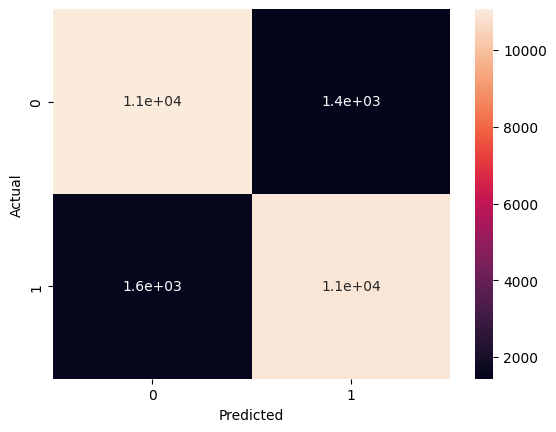

In [ ]:
import seaborn as sn
import pandas as pd
print("IMDB Heatmap\n")
m = pd.crosstab(y_test, yp.reshape(y_test.shape), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(m, annot=True)


#Predict a random value from x_test

-> run these cell everytime will predict a random value from x_test <-

In [ ]:
import random as r
# where n is a random index in y_test
n = r.randint(0,len(x_test))
yp1 = (model.predict(x_test[n].reshape(1,500))>=0.5).astype(int)
print("at index '{}' in x_test \nPredicted value = class '{}' \nActual value    = class '{}'".format(n, yp1[0,0] ,y_test[n]))

1/1 [==============================] - 0s 38ms/step
at index '22866' in x_test 
Predicted value = class '0' 
Actual value    = class '0'
